   ## Ahmad Soni - 668564                Assignment 1
   
   In this assignment we will examine the linear regression algorithm from multiple perspectives. Please find contained:
   
   1. Simple Linear Regression
   
   2. Gradient Descent Linear Regression to examine varying learning rates
   
   3. Multiple Gradient Descent Linear Regression with feature scaling and standardization

We will be using a dataset that examines CO2 Emmissions for Cars based on various data such as Enginesize, Cylinders and year model. It was sourced from https://medium.com/@shuklapratik22/linear-regression-from-scratch-a3d21eff4e7c

In [28]:
#Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from array import array

In [2]:
#Import Csv

data = pd.read_csv("Fuel.csv")
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [3]:
#We want to only use features which we think are useful:

frame = data[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
frame.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


We can choose any of these features to compare, but in this case I want to look at Engine size vs CO2 Emissions for singular regression


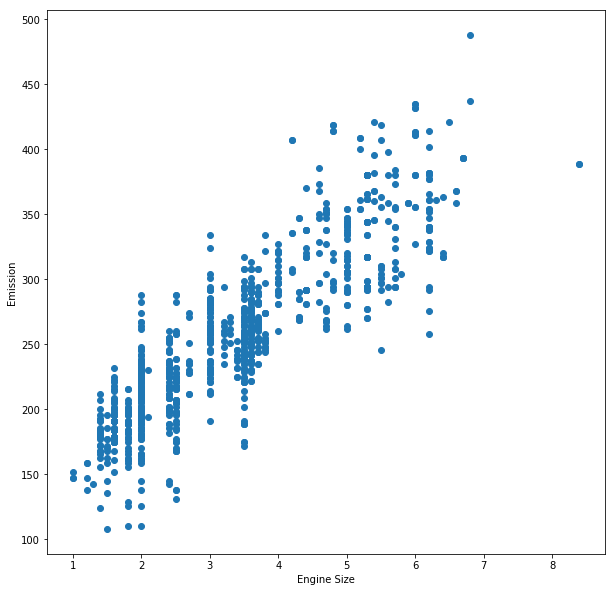

In [125]:
print('We can choose any of these features to compare, but in this case I want to look at Engine size vs CO2 Emissions for singular regression')

plt.figure(figsize = (10,10))
plt.scatter(frame["ENGINESIZE"], frame["CO2EMISSIONS"])
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [5]:
#We need split our data into a training and testing set
training = frame[:(int((len(data)*0.8)))]
testing = frame[(int((len(data)*0.8))):]

print("Training Data", training.shape)
print("Testing", testing.shape)
print("Total", frame.shape)

Training Data (853, 4)
Testing (214, 4)
Total (1067, 4)


In [6]:
#We need to calculate the mean CO2-Emission for usage later

Emission = frame["CO2EMISSIONS"]

#hardcoded
sumE = Emission.sum()
Carcount = len(Emission)
avg1 = sumE/Carcount

#built-in
avg2 = Emission.mean()
print(avg1)
print(avg2)

256.2286785379569
256.2286785379569


In [7]:
#We now need to write the main function for the linear regression using gradient descent
def linear_regression(input_feature, output_feature):
    X = input_feature
    Y = output_feature
    N = len(X)
    
    X_mean = X.mean()
    Y_mean = Y.mean()
    
    S_YX = (Y*X).sum()
    S_YX_N = (Y.sum()*X.sum()) / N
    
    S_XX = (X*X).sum()
    S_XX_N = (X.sum()*X.sum()) / N
    
    slope = (S_YX - S_YX_N)/(S_XX - S_XX_N)
    
    intercepts = Y_mean - slope * X_mean
    
    return(intercepts,slope)
    

In [8]:
#Find slope and intercept for our features

data_intercept, data_slope = linear_regression(training["ENGINESIZE"],training["CO2EMISSIONS"])

print("Intercept", data_intercept)
print("Slope", data_slope)
print('These function as our X and Y values for the equation of the regression line')

Intercept 127.16989950881992
Slope 38.79512383605651
These function as our X and Y values for the equation of the regression line


Text(0, 0.5, 'Emission')

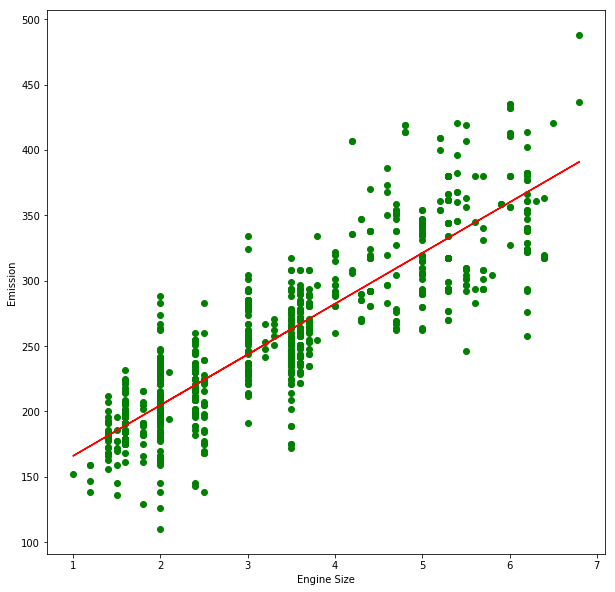

In [9]:
#plotting the regression line
plt.figure(figsize = (10,10))
plt.scatter(training.ENGINESIZE, training.CO2EMISSIONS, color = 'green')
plt.plot(training["ENGINESIZE"], data_slope*training["ENGINESIZE"] + data_intercept, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [10]:
#Now we can write a function to predict values using the model

def prediction(input_feature, intercepts, slope):
    predict_val = input_feature*slope + intercepts
    
    return predict_val

def engine_predict(output_feature, intercepts, slope):
    predict_eng = (output_feature - intercepts)/slope
    return predict_eng

In [11]:
# say we wanted to predict the emission for a car of engine size 5

size = 5

predict_emm = prediction(size, data_intercept,data_slope)
print("Emission:", predict_emm)

#say we wanted to predict engine size for an emission of 275

emm = 275

predict_en = engine_predict(emm,data_intercept,data_slope)
print("Engine Size:", predict_en)

Emission: 321.14551868910246
Engine Size: 3.8105330225492295


This is an extremely basic look at linear regression, we would need a more complex ML model if we want to examine things such as learning rates etc

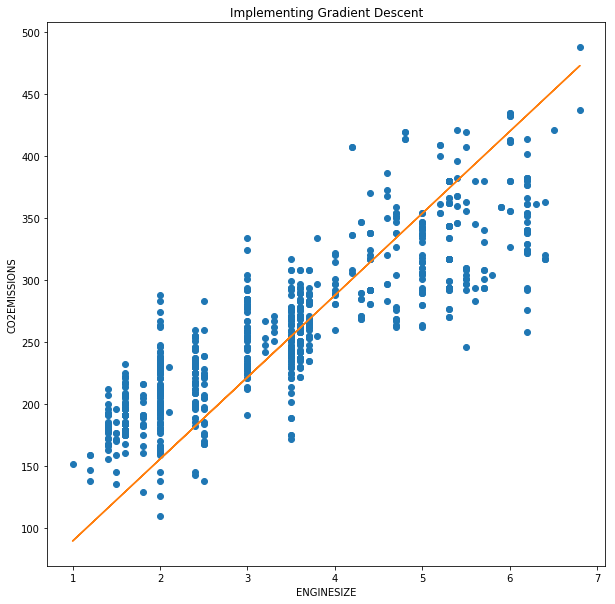

In [14]:
#Part 2 Gradient Descent and Learning Rates
# function for plotting regression line
def plot_regression_line(X,m,b):
	regression_x = X.values
	regression_y = []
	for x in regression_x:
		y = m*x + b
		regression_y.append(y)

	plt.plot(regression_x,regression_y)
	plt.pause(1)

plt.figure(figsize = (10,10))


#Using the split data from earlier

X = training["ENGINESIZE"]
Y = training["CO2EMISSIONS"]

plt.plot(X,Y,'o')
plt.title("Implementing Gradient Descent")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

m = 0
b = 0
lr = 0.0005  #learning Rate

# gradient descent function
def grad_desc(X,Y,m,b):
	for point in zip(X,Y):
		x = point[0]
		y_actual = point[1]

		y_prediction = m*x + b

		error = y_prediction - y_actual
        

		delta_m = -1 * (error*x) * lr
		delta_b = -1 * (error) * lr
		m = m + delta_m
		b = b + delta_b
	return m,b	 

#for i in range(0,10):
#print(error)
m,b = grad_desc(X,Y,m,b)
plot_regression_line(X,m,b)

plt.show()

from sklearn import linear_model
from sklearn.metrics import r2_score

test_x = np.array(testing[['ENGINESIZE']])
test_y = np.array(testing[['CO2EMISSIONS']])
test_y_ = grad_desc

#print(error)
#print("Mean Abs Error: %.2f" % np.mean(np.absolute(b - test_y)))


Let's try run the same code but with a larger learning rate and see what result we produce

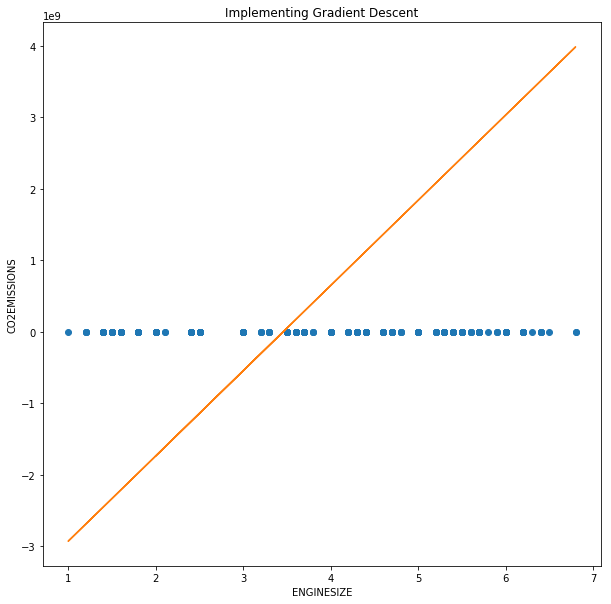

In [15]:
# function for plotting regression line
def plot_regression_line(X,m,b):
	regression_x = X.values
	regression_y = []
	for x in regression_x:
		y = m*x + b
		regression_y.append(y)

	plt.plot(regression_x,regression_y)
	plt.pause(1)

plt.figure(figsize = (10,10))


X = training["ENGINESIZE"]
Y = training["CO2EMISSIONS"]

plt.plot(X,Y,'o')
plt.title("Implementing Gradient Descent")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

m = 0
b = 0
lr = 0.09 #learning Rate

# gradient descent function
def grad_desc(X,Y,m,b):
	for point in zip(X,Y):
		x = point[0]
		y_actual = point[1]

		y_prediction = m*x + b

		error = y_prediction - y_actual

		delta_m = -1 * (error*x) * lr
		delta_b = -1 * (error) * lr
		m = m + delta_m
		b = b + delta_b
	return m,b	 

#for i in range(0,10):
m,b = grad_desc(X,Y,m,b)
plot_regression_line(X,m,b)

plt.show()

Let's try again, this time for a smaller learning rate

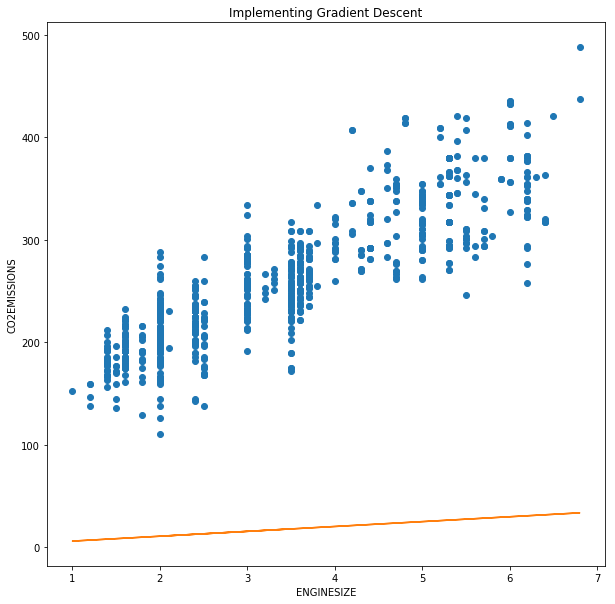

In [59]:
# function for plotting regression line
def plot_regression_line(X,m,b):
	regression_x = X.values
	regression_y = []
	for x in regression_x:
		y = m*x + b
		regression_y.append(y)

	plt.plot(regression_x,regression_y)
	plt.pause(1)

plt.figure(figsize = (10,10))


X = training["ENGINESIZE"]
Y = training["CO2EMISSIONS"]

plt.plot(X,Y,'o')
plt.title("Implementing Gradient Descent")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

m = 0
b = 0
lr = 0.000006 #learning Rate

# gradient descent function
def grad_desc(X,Y,m,b):
	for point in zip(X,Y):
		x = point[0]
		y_actual = point[1]

		y_prediction = m*x + b

		error = y_prediction - y_actual

		delta_m = -1 * (error*x) * lr
		delta_b = -1 * (error) * lr
		m = m + delta_m
		b = b + delta_b
	return m,b	 

#for i in range(0,10):
m,b = grad_desc(X,Y,m,b)
plot_regression_line(X,m,b)

plt.show()

From these three examples we can see that using learning rates that are either too high or too low can result in non-fitting regression lines and could even lead to divergence if the values are too high or too low. This is because on a too low learning rate, the algorithm takes too long to reach convergence, and on a rate that's too high it bounces between values without being able to narrow down the convergence value.

We now want to implement multiple regression with some extra features as well as normalization

1067
very basic plots so we know what to expect


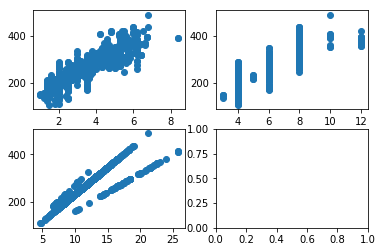

In [114]:
#We now want to add some extra features to plot
test_frame = frame[["ENGINESIZE","CYLINDERS","CO2EMISSIONS","FUELCONSUMPTION_COMB"]]
test_frame.head()

x = test_frame[['ENGINESIZE','CYLINDERS',"FUELCONSUMPTION_COMB"]].values
y = test_frame['CO2EMISSIONS'].values.reshape(-1,1)
l = len(y)
print(l)

fig,axs = plt.subplots(2,2)
axs[0, 0].plot(x[:,0],y,'o')
axs[0, 1].plot(x[:,1],y,'o')
axs[1, 0].plot(x[:,2],y,'o')

print('very basic plots so we know what to expect')

In [115]:
# Check correlation of each input with the input
from scipy.stats import pearsonr
print(f'Correlation between x1 and y = {pearsonr(x[:,0],y[:,0])[0]:.2f}')
print(f'Correlation between x2 and y = {pearsonr(x[:,1],y[:,0])[0]:.2f}')
print(f'Correlation between x3 and y = {pearsonr(x[:,2],y[:,0])[0]:.2f}')


Correlation between x1 and y = 0.87
Correlation between x2 and y = 0.85
Correlation between x3 and y = 0.89


This is a Pearson coefficient correlation, it tells us we can expect a strong correlation between our chosen inputs and outputs since all the values are extremely close to 1. This means it's a good dataset to perform linear regression on

In [116]:
# Add a bias to the input vector for data regularization
Z = np.concatenate((np.ones((len(x),1)),x),axis=1)
Z.shape

(1067, 4)

We implement feature scaling to normalize the scales between each variable so we might achieve convergence more efficiently

In [127]:
#Implement Feature Scaling for inputs
Xnorm = Z.copy()
minx = np.min(Z[:,1:])
maxx = np.max(Z[:,1:])
Xnorm[:,1:] = (Z[:,1:]-minx)/(maxx-minx)
Xnorm[:10,:]



array([[1.        , 0.04032258, 0.12096774, 0.30241935],
       [1.        , 0.05645161, 0.12096774, 0.34677419],
       [1.        , 0.02016129, 0.12096774, 0.19758065],
       [1.        , 0.10080645, 0.2016129 , 0.40725806],
       [1.        , 0.10080645, 0.2016129 , 0.38709677],
       [1.        , 0.10080645, 0.2016129 , 0.36290323],
       [1.        , 0.10080645, 0.2016129 , 0.36693548],
       [1.        , 0.10887097, 0.2016129 , 0.40725806],
       [1.        , 0.10887097, 0.2016129 , 0.42741935],
       [1.        , 0.05645161, 0.12096774, 0.33064516]])

In [126]:
#Implement Feature Scaling for outpus
ynorm = y.copy()
maxy = np.max(y)
miny = np.min(y)
ynorm = (y-miny)/(maxy - miny) 
ynorm[:10,0]

array([0.23157895, 0.29736842, 0.07368421, 0.38684211, 0.35789474,
       0.32105263, 0.32631579, 0.38684211, 0.41842105, 0.27368421])

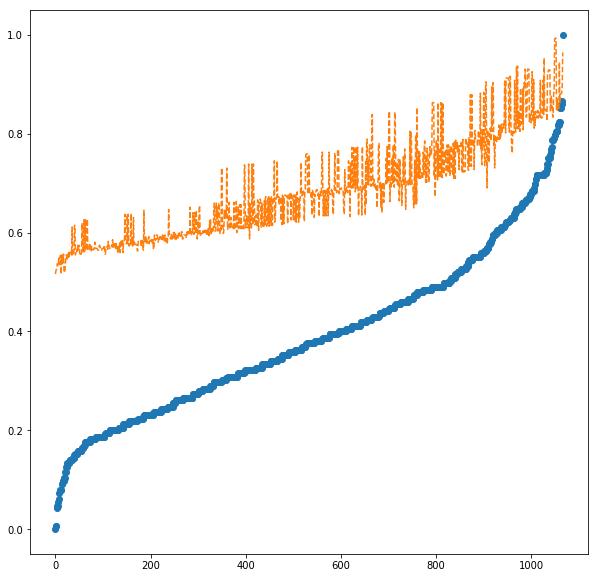

In [95]:
# Initial estimations this is what it would look like before applying Gradient Descent
theta0 = np.zeros((Z.shape[1],1))+0.4


ypred = Xnorm.dot(theta0)

sortidx = np.argsort(ynorm[:,0])
plt.figure(figsize = (10,10))
plt.plot(ynorm[sortidx,0],'o')
plt.plot(ypred[sortidx,0],'--')

In [118]:
# calculate gradient
def grad(theta):
    dJ = 1/m*np.sum((Xnorm.dot(theta)-ynorm)*Xnorm,axis=0).reshape(-1,1)
    return dJ

In [119]:
#cost function
def cost(theta):
    J = np.sum((Xnorm.dot(theta)-ynorm)**2,axis=0)[0]
    return J
cost(theta0)


100.37650656057144

In [139]:
#Gradient Descent Function

def GradientDescent(theta0,learning_rate = 0.0005,bars=1000,TOL=1e-7):
    
    theta_old = [theta0]
    J_history = [cost(theta0)]
    
    thetanew = theta0*10000
    print(f'bars \t Cost(J) \t')
    for bars in range(bars):
        if bars%100 == 0:
            print(f'{bars:5d}\t{J_history[-1]:7.4f}\t')
        dJ = grad(theta0)
        J = cost(theta0)
        
        thetan = theta0 - learning_rate*dJ
        theta_old.append(thetan)
        J_history.append(J)
        
        if np.sum((thetan - theta0)**2) < TOL:
            print('Convergence.')
            break
        theta0 = thetan

    return thetan,theta_old,J_history




bars 	 Cost(J) 	
    0	100.3765	
  100	 7.4596	
  200	 6.1783	
  300	 5.3785	
  400	 4.8793	
  500	 4.5675	
Convergence achieved.


Text(0.5, 0, 'convergence of the cost function')

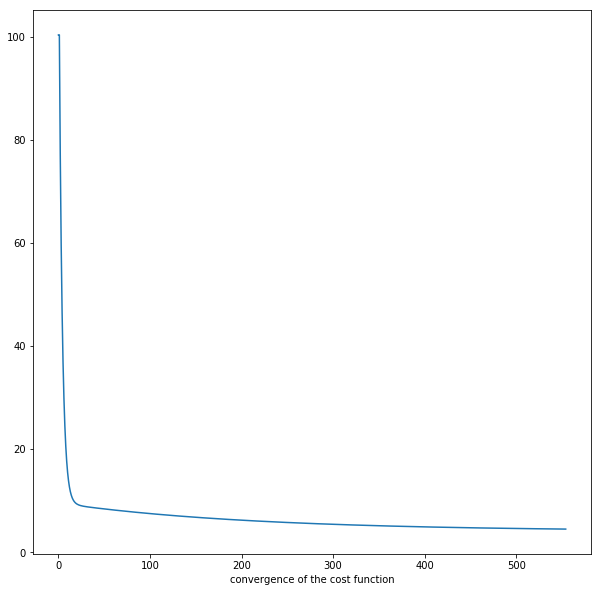

In [140]:
theta,theta_old,J_history = GradientDescent(theta0)
plt.figure(figsize = (10,10))
plt.plot(J_history)

plt.xlabel("convergence of the cost function")


Text(0, 0.5, 'CO2EMISSIONS')

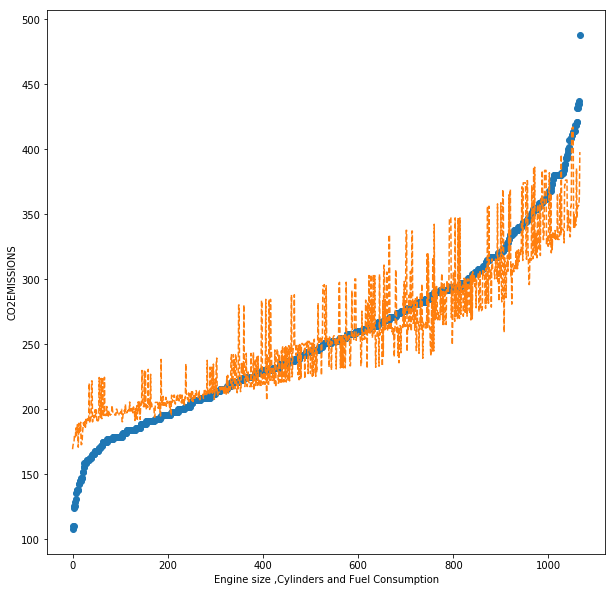

In [130]:
yprednorm = Xnorm.dot(theta)

ypred = yprednorm*(maxy-miny) + miny
plt.figure(figsize = (10,10))
plt.plot(y[sortidx,0],'o')
plt.plot(ypred[sortidx,0],'--')

plt.xlabel("Engine size ,Cylinders and Fuel Consumption")
plt.ylabel("CO2EMISSIONS")


In [131]:
#prediction algorithm
def predict(x,theta):
    xnorm = (x-minx)/(maxx-minx)
    yprednorm = xnorm.dot(theta)
    ypred = yprednorm*(maxy - miny) + miny
    return ypred

In [134]:
#predict CO2 Emission for engine size 3.5, 5 cylinders and 10.1 fuel consumption

v = np.array([1,3.5,5,10.1])

predict(v,theta)

array([235.95498951])